# Introduction to Data Science

Authors: Jo Ciucă (ANU)

Some of the parts of this tutorial are from Jake VanderPlas' excellent online course on Pandas.

In this Tutorial, we introduce the Python-based Data Science library Pandas and demonstrate some of its functionality by examining Pandas' main data structure, the DataFrame. We focus on the essentials of "data hacking" of loading, cleaning, exploring and visualising the data.

This notebook is organised in two sessions. The first one is focused on teaching Pandas (~50 mins):

1. **Primer of Pandas**: Data structures, Data I/O
2. **DataFrame Magic**: loading and reading the data as a dataframe, summary stats, sorting, iterating/selecting/changing rows and columns
3. **Advanced Pandas Techniques**: Filtering, Grouping and Aggregating, Conditional Changes, Merging and joining

*10 minutes break!*

The second session is focused on Data Visualisation and Exploratory Data Analysis (~50 mins):
4. **Data Visualisation with Pandas and Seaborn**: scatter plots, histograms, line plots, bar plots
5. **Exploratory Data Analysis** on a brand new DataFrame

With that in mind, let's get some pandas. 

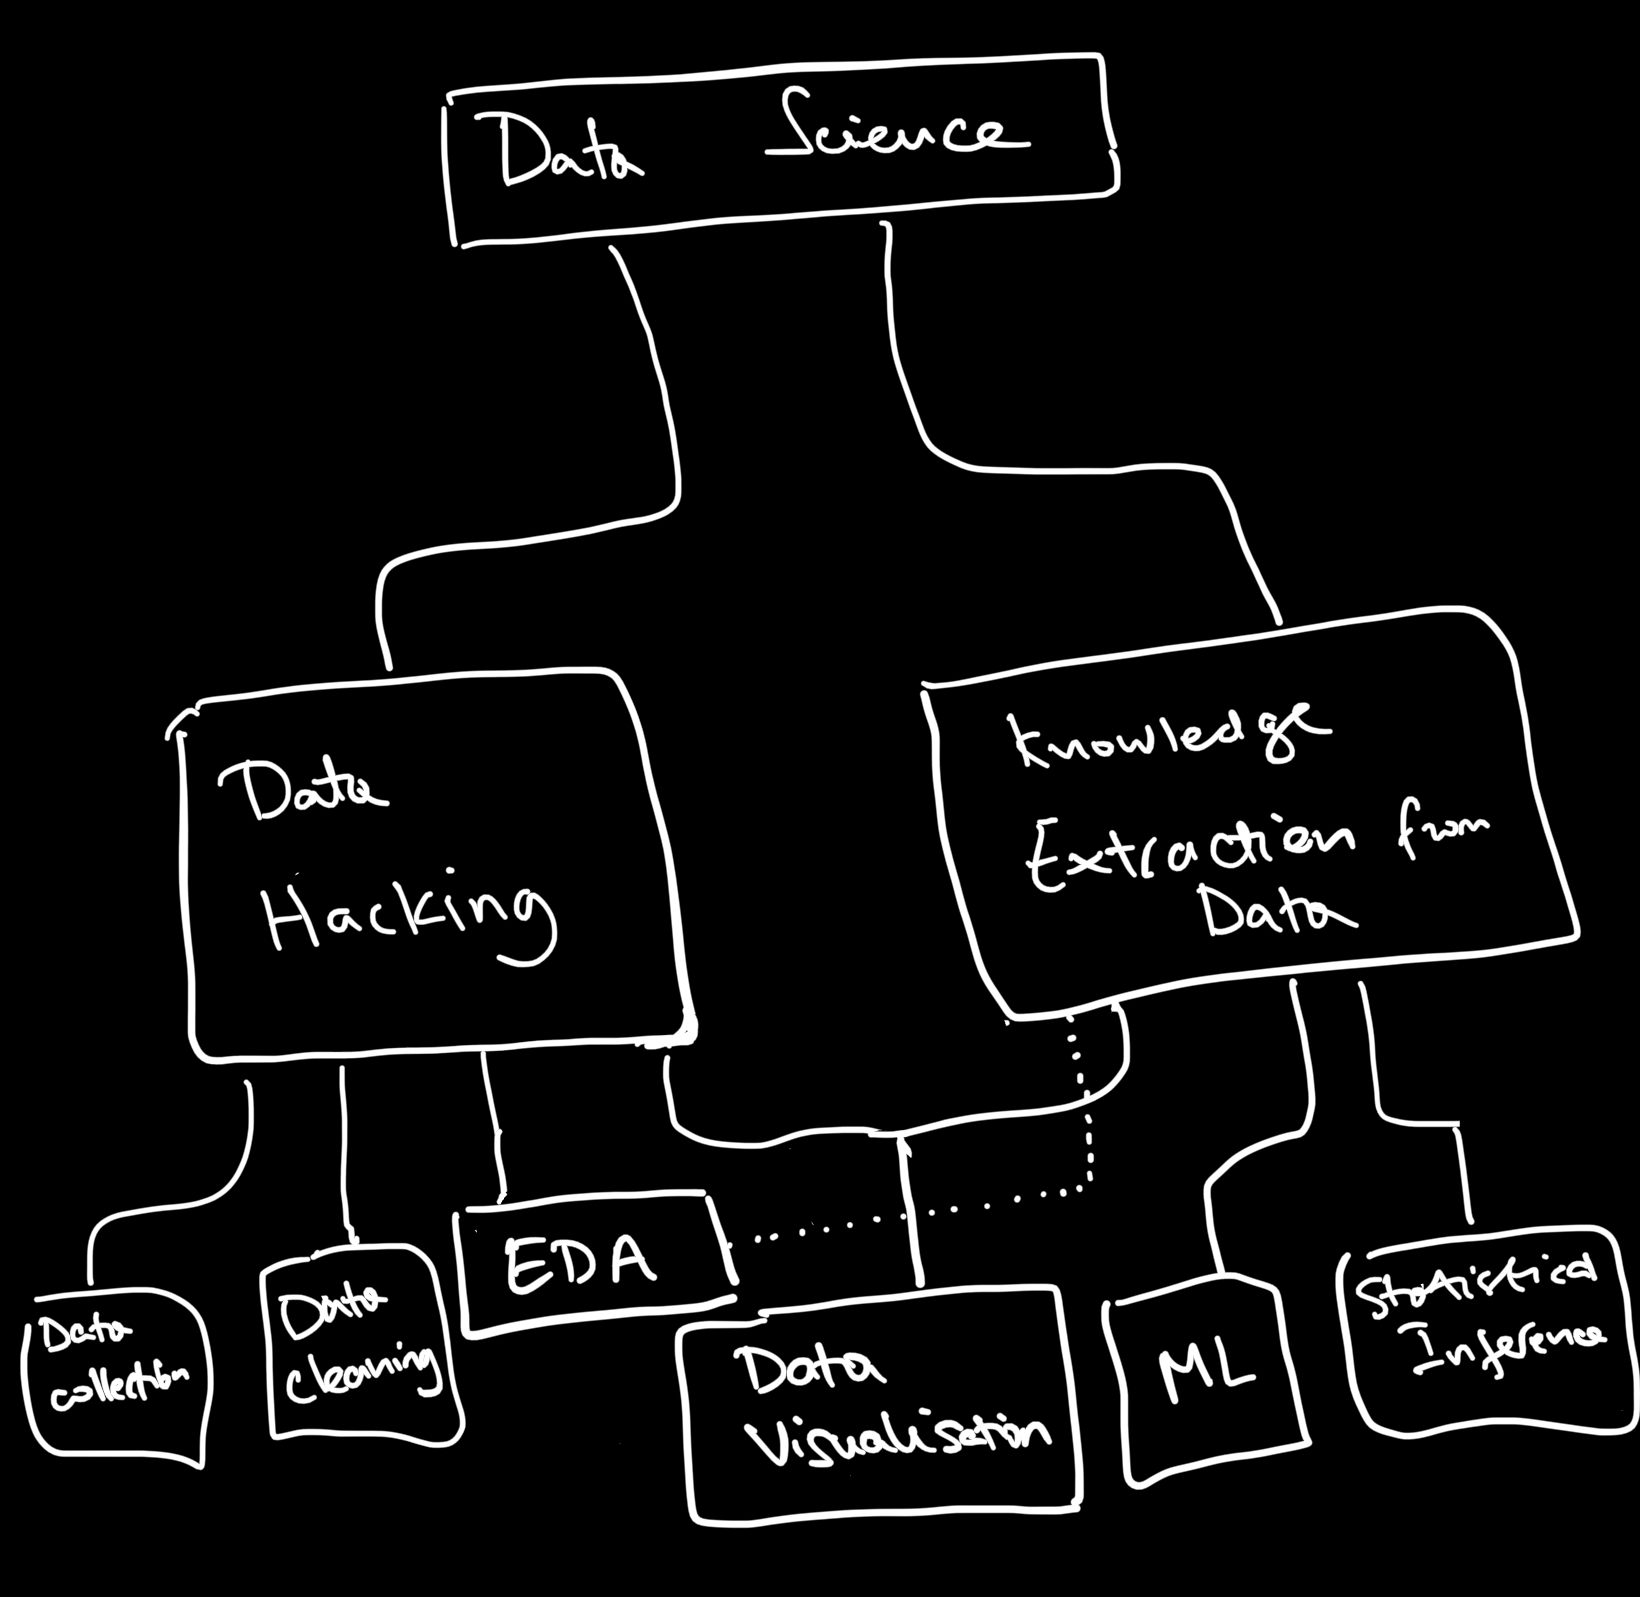

In [2]:
from IPython.display import Image
Image('images/ds_insights.jpeg', width=500)

## Primer of Pandas:
* Pandas Building Blocks: The Series, DataFrame and Index 
* Creating and saving a DataFrame
* Dealing with missing data

In [3]:
# create a pandas series from a list
import pandas as pd
import numpy as np

#set the seed to random
np.random.seed(42)

s = pd.Series([1,3,5,7,9])

# create a pandas series from a dictionary
d = {'a': 1, 'b': 3, 'c': 5, 'd': 7, 'e': 9}
s = pd.Series(d)

#create a pandas series from a numpy array
import numpy as np
a = np.array([1,3,5,7,9])
s = pd.Series(a)

s

0    1
1    3
2    5
3    7
4    9
dtype: int64

In [4]:
# extracting a value from the series

# extract the value at index 0
s[0]
s.iloc[0]
s[0] == s.iloc[0] #integer location

#how about when we have strings as the index? We can use a label based location by calling s.loc[label] instead of s[label]
s = pd.Series([1,3,5,7,9], index=['a','b','c','d','e'])
s.index.name = 'ID'
s.name = 'Cats'

print(s)

print(s.iloc[1])

ID
a    1
b    3
c    5
d    7
e    9
Name: Cats, dtype: int64
3


In [5]:
s.loc['b'] #label based location
s['b']

3

In [6]:
# let's create a pandas dataframe from a dictionary consisting of how many cats and dogs a given household has
d = {'cats': [1,3,5,7,9], 'dogs': [2,4,6,8,10]}
df = pd.DataFrame(d)

# another way to create a dataframe

cats = pd.Series([1,3,5,7,9], name='cats')
dogs = pd.Series([2,4,6,8,10], name='dogs')
df = pd.concat([cats, dogs], axis=1)

print(df)

birds = pd.Series([1,3,5,7,9], name='birds')
#add birds to df
new_df = pd.concat([df, birds], axis=1)
print(new_df)

# Q: What happens if birds has suddenly become a pandas series with 6 elements instead of 5? How will the new_df look like?

#map the index column to a different column corresponding to some family names
new_df.index = ['Yuan-Sen', 'Ali', 'Erwin', 'Jo', 'Fei']
print(new_df)

new_df.index.name = 'Name'
print(new_df)

print(new_df.loc['Erwin']) # label based location
print(new_df.iloc[2]) # we will soon learn how to select rows based on a condition

# now that we created this dataframe, let's save it somewhere
new_df.to_csv('data/cats_dogs_birds.csv')

   cats  dogs
0     1     2
1     3     4
2     5     6
3     7     8
4     9    10
   cats  dogs  birds
0     1     2      1
1     3     4      3
2     5     6      5
3     7     8      7
4     9    10      9
          cats  dogs  birds
Yuan-Sen     1     2      1
Ali          3     4      3
Erwin        5     6      5
Jo           7     8      7
Fei          9    10      9
          cats  dogs  birds
Name                       
Yuan-Sen     1     2      1
Ali          3     4      3
Erwin        5     6      5
Jo           7     8      7
Fei          9    10      9
cats     5
dogs     6
birds    5
Name: Erwin, dtype: int64
cats     5
dogs     6
birds    5
Name: Erwin, dtype: int64


#### Dealing with Missing Data

Missing data is a key piece of data science. The first thing we want to do with missing data is to find it.

* isnull(), notnull()

Once we found the missing data, we have primarily two options:
* Get rid of it. Bye, bye.
* Impute the missing data, i.e. choose meaningful values to replace the missing data with.



In [94]:
#create a pandas series with a few missing values
s = pd.Series([1,None,5,np.nan,9])
print(s)

0    1.0
1    NaN
2    5.0
3    NaN
4    9.0
dtype: float64


In [95]:
s.isnull()


0    False
1     True
2    False
3     True
4    False
dtype: bool

In [97]:
s.notnull()

0     True
1    False
2     True
3    False
4     True
dtype: bool

In [98]:
s[s.notnull()] #select only the non-null values using the boolean values

0    1.0
2    5.0
4    9.0
dtype: float64

In [101]:
s.dropna() #drop the rows with missing values

0    1.0
2    5.0
4    9.0
dtype: float64

In [103]:
# let's create a pandas dataframe with a few missing values
d = {'cats': [1,np.nan,5,np.nan,9], 'dogs': [2,4,None,8,10]}
df = pd.DataFrame(d)
df


cats  dogs
0   1.0   2.0
1   NaN   4.0
2   5.0   NaN
3   NaN   8.0
4   9.0  10.0

In [106]:
df.dropna() #drop all the rows with missing values

cats  dogs
0   1.0   2.0
4   9.0  10.0

In [110]:
df.dropna(axis='columns') #or axis 1; drop all the columns with missing values

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]

In [119]:
df.dropna(axis='rows', thresh=2) #thresh=2 means that we only drop the rows that have at least 2 missing values

cats  dogs
0   1.0   2.0
4   9.0  10.0

In [124]:
#only drop the nan values from the first column
df.dropna(subset=['cats']) #, thresh=1) #thresh=1 means that we only drop the rows that have at least 1 missing value


cats  dogs
0   1.0   2.0
2   5.0   NaN
4   9.0  10.0

In [126]:
#filling in the missing values
df.fillna(-1) #fill in the missing values with 0


cats  dogs
0   1.0   2.0
1  -1.0   4.0
2   5.0  -1.0
3  -1.0   8.0
4   9.0  10.0

In [132]:
df.fillna(-1, axis=1) #fill in the missing values with -1 for the columns

#just fill the first axis
df['cats'].fillna(-1)

#fill the missing values with the mean of the column
df['cats'].fillna(df['cats'].mean())

#fill the missing values with forward filling
df['cats'].fillna(method='ffill')


0    1.0
1    1.0
2    5.0
3    5.0
4    9.0
Name: cats, dtype: float64


To recap:
* isnull(): Generate a boolean mask indicating missing values
* notnull(): Opposite of isnull()
* dropna(): Return a filtered version of the data
* fillna(): Return a copy of the data with missing values filled or imputed

So far, we focused on creating our very own dataframe from scratch. Often times, we already have a dataset that we would like to explore. We now turn our attention to loading this special datafile and reading it properly.

## DataFrame Magic

The pandas DataFrame is a versatile and powerful tool for data analysis, it is a two-dimensional, mutable table structure that can hold various types of data with labeled columns and rows. It's similar to a spreadsheet and can be programmed to suit various analysis tasks.

We can explore and change it in several meaningful ways:
* High-level characteristics of the DataFrame
* Selecting rows and columns
* Sorting the df based on a row or column
* Changing the contents of a row or colum
* Writing the dataframe to a file

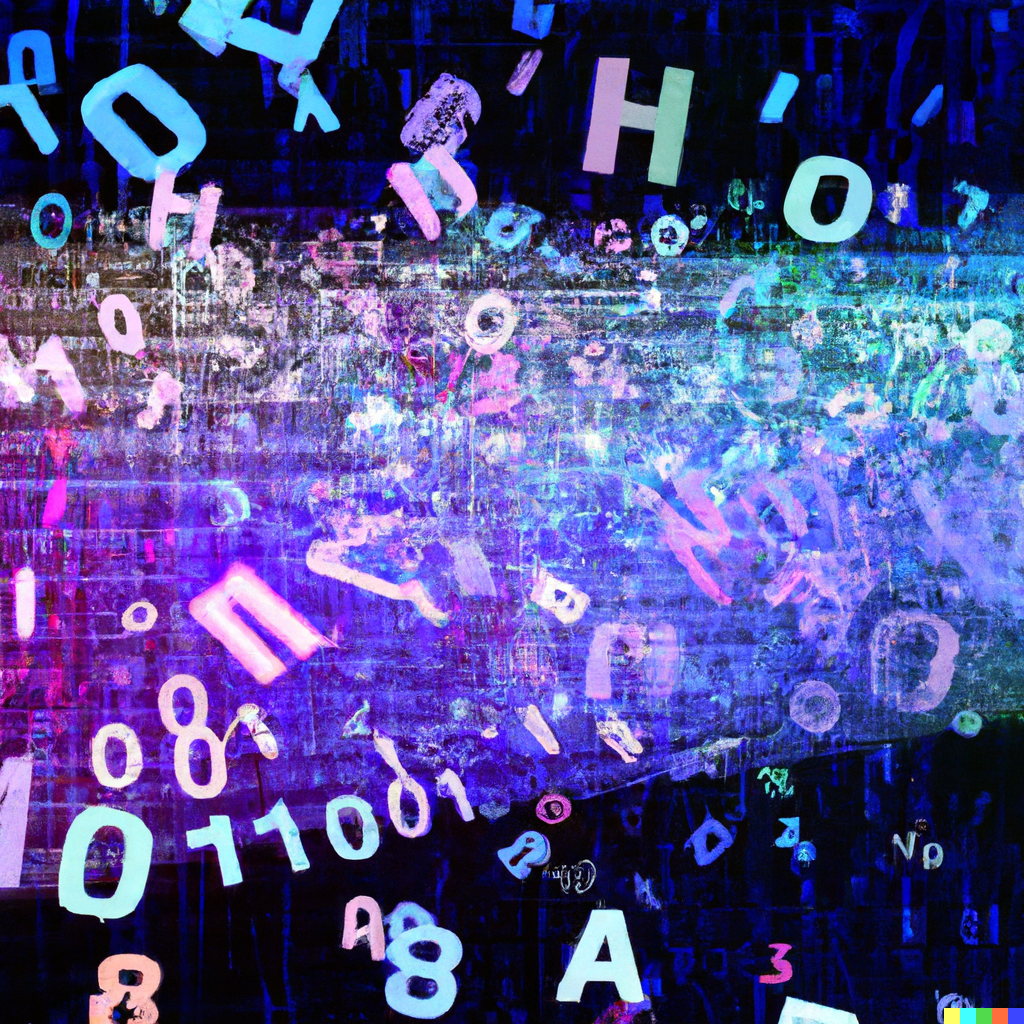

In [3]:
Image('images/dataframe_magic.png', width=400) #credit: DALL-E-2

In [7]:
#let's load the netflix dataset taken from Kaggle https://www.kaggle.com/datasets/shivamb/netflix-shows
df_netflix = pd.read_csv('data/netflix_titles.csv')
df_netflix.head()

# let's see how many rows and columns we have
df_netflix.shape

(8807, 12)

In [8]:
# let's get the column names 
df_netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [7]:
# let's see the data types of each column
df_netflix.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [9]:
df_netflix.info() #putting it all together

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [10]:
# #how about if we want to read each column separately?
# print(df_netflix['show_id'])

# #and a subset of columns
# print(df_netflix[['show_id', 'title']])

# #how about if we want to read each row separately?
# print(df_netflix.iloc[0])

# #and a subset of rows
# print(df_netflix.iloc[0:5])

for index, row in df_netflix.iterrows():
    print(index, row['title'])

#how about if we want to read a specific cell?
# print(df_netflix.iloc[0,0])

0 Dick Johnson Is Dead
1 Blood & Water
2 Ganglands
3 Jailbirds New Orleans
4 Kota Factory
5 Midnight Mass
6 My Little Pony: A New Generation
7 Sankofa
8 The Great British Baking Show
9 The Starling
10 Vendetta: Truth, Lies and The Mafia
11 Bangkok Breaking
12 Je Suis Karl
13 Confessions of an Invisible Girl
14 Crime Stories: India Detectives
15 Dear White People
16 Europe's Most Dangerous Man: Otto Skorzeny in Spain
17 Falsa identidad
18 Intrusion
19 Jaguar
20 Monsters Inside: The 24 Faces of Billy Milligan
21 Resurrection: Ertugrul
22 Avvai Shanmughi
23 Go! Go! Cory Carson: Chrissy Takes the Wheel
24 Jeans
25 Love on the Spectrum
26 Minsara Kanavu
27 Grown Ups
28 Dark Skies
29 Paranoia
30 Ankahi Kahaniya
31 Chicago Party Aunt
32 Sex Education
33 Squid Game
34 Tayo and Little Wizards
35 The Father Who Moves Mountains
36 The Stronghold
37 Angry Birds
38 Birth of the Dragon
39 Chhota Bheem
40 He-Man and the Masters of the Universe
41 Jaws
42 Jaws 2
43 Jaws 3
44 Jaws: The Revenge
45 My He

In [11]:
df_netflix.describe() #Q: why did we only get one column?

release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000

In [12]:
df_netflix.describe(include=['O']) # we can include the object data type as well

show_id   type                 title       director  \
count     8807   8807                  8807           6173   
unique    8807      2                  8807           4528   
top         s1  Movie  Dick Johnson Is Dead  Rajiv Chilaka   
freq         1   6131                     1             19   

                      cast        country       date_added rating  duration  \
count                 7982           7976             8797   8803      8804   
unique                7692            748             1767     17       220   
top     David Attenborough  United States  January 1, 2020  TV-MA  1 Season   
freq                    19           2818              109   3207      1793   

                           listed_in  \
count                           8807   
unique                           514   
top     Dramas, International Movies   
freq                             362   

                                              description  
count                                                8807  
unique                                               8775  
top     Paranormal activity at a lush, abandoned prope...  
freq                                                    4

In [13]:
df_netflix.isnull().sum() #how many null values are there in each column

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [14]:
df_netflix['release_year']

0       2020
1       2021
2       2021
3       2021
4       2021
        ... 
8802    2007
8803    2018
8804    2009
8805    2006
8806    2015
Name: release_year, Length: 8807, dtype: int64

In [15]:
#how to find the mean of a column
df_netflix['release_year'].mean()
#the min and max

df_netflix['release_year'].min()
df_netflix['release_year'].max()

2021

### Sorting Data

In [16]:
df_netflix.sort_values('release_year', ascending=True) #sort by release year
df_netflix.sort_values(['release_year', 'director'], ascending=[True, True]) #sort by release year and then by director
#can also boolean values 1 and 0 to sort the dataset
df_netflix.sort_values(['release_year', 'director'], ascending=[1, 1]) #sort by release year and then by director

#just show the release and director columns
df_netflix[['title', 'release_year', 'director']].sort_values(['release_year', 'director'], ascending=[True, True]).head(20)

title  release_year  \
4250                 Pioneers: First Women Filmmakers*          1925   
7790                                    Prelude to War          1942   
8205                              The Battle of Midway          1942   
8739                Why We Fight: The Battle of Russia          1943   
8660     Undercover: How to Operate Behind Enemy Lines          1943   
8763                   WWII: Report from the Aleutians          1943   
8640                                  Tunisian Victory          1944   
8436                                 The Negro Soldier          1944   
8419  The Memphis Belle: A Story of a\nFlying Fortress          1944   
7219                           Know Your Enemy - Japan          1945   
7575                          Nazi Concentration Camps          1945   
7930                                        San Pietro          1945   
1331               Five Came Back: The Reference Films          1945   
7294                                Let There Be Light          1946   
7743               Pioneers of African-American Cinema          1946   
8587                                       Thunderbolt          1947   
1699                                   White Christmas          1954   
2375                                   The Blazing Sun          1954   
7954                               Scandal in Sorrento          1955   
8506                                 The Sign of Venus          1955   

                                               director  
4250                                                NaN  
7790                                        Frank Capra  
8205                                          John Ford  
8739                        Frank Capra, Anatole Litvak  
8660                                          John Ford  
8763                                        John Huston  
8640  Frank Capra, John Huston, Hugh Stewart, Roy Bo...  
8436                                     Stuart Heisler  
8419                                      William Wyler  
7219                           Frank Capra, Joris Ivens  
7575                                     George Stevens  
7930                                        John Huston  
1331                                                NaN  
7294                                        John Huston  
7743  Oscar Micheaux, Spencer Williams, Richard E. N...  
8587                        William Wyler, John Sturges  
1699                                     Michael Curtiz  
2375                                    Youssef Chahine  
7954                                          Dino Risi  
8506                                          Dino Risi

### Changing the DataFrame

We learn how to add, delete columns, create new columns from existent columns.



In [17]:

# create a new column called revenue with random integer values
df_netflix['revenue'] = np.random.randint(0,1000, size=len(df_netflix))

df_netflix.revenue # can also access the column by df_netflix['revenue']
# we can check the type is integer for example, can change it to float
# df_netflix.revenue = df_netflix.revenue.astype(float)
# df_netflix.revenue.dtype
df_netflix.head()

#delete the revenue column

df_netflix.drop('revenue', axis=1, inplace=True) #inplace=True means we are modifying the original dataframe

In [18]:
#but let's say we want the revenue in the 20th and 21st century

# let's create a new column called revenue_millions
df_netflix['revenue_20th'] =  np.random.randint(0,50, size=len(df_netflix))
df_netflix['revenue_21st'] =  np.random.randint(0,1000, size=len(df_netflix))

# just show these 2 last columns, sorted by the release_year in ascending order
df_netflix[['title', 'release_year', 'revenue_20th', 'revenue_21st']].sort_values('release_year', ascending=True).head(20)

title  release_year  \
4250                 Pioneers: First Women Filmmakers*          1925   
7790                                    Prelude to War          1942   
8205                              The Battle of Midway          1942   
8660     Undercover: How to Operate Behind Enemy Lines          1943   
8739                Why We Fight: The Battle of Russia          1943   
8763                   WWII: Report from the Aleutians          1943   
8640                                  Tunisian Victory          1944   
8436                                 The Negro Soldier          1944   
8419  The Memphis Belle: A Story of a\nFlying Fortress          1944   
7930                                        San Pietro          1945   
1331               Five Came Back: The Reference Films          1945   
7219                           Know Your Enemy - Japan          1945   
7575                          Nazi Concentration Camps          1945   
7743               Pioneers of African-American Cinema          1946   
7294                                Let There Be Light          1946   
8587                                       Thunderbolt          1947   
2375                                   The Blazing Sun          1954   
1699                                   White Christmas          1954   
7954                               Scandal in Sorrento          1955   
8506                                 The Sign of Venus          1955   

      revenue_20th  revenue_21st  
4250            44           404  
7790            45           605  
8205             8            17  
8660            47           241  
8739             2           416  
8763            38           365  
8640            25           933  
8436            33            21  
8419             8           327  
7930            39           365  
1331            18           804  
7219            40            70  
7575            47           834  
7743             4           181  
7294             9             7  
8587             3           612  
2375            25           448  
1699            25           371  
7954            49           695  
8506            44           756

In [20]:
df_netflix['total_revenue'] = df_netflix['revenue_20th'] + df_netflix['revenue_21st']
df_netflix.head(5) #good to double check with human-driven inspection

#find the index of the columns
print(df_netflix.columns.get_loc('revenue_20th'))
print(df_netflix.columns.get_loc('revenue_21st'))

# how can we do this in a different way by using the iloc function?
df_netflix['new_revenue']= df_netflix.iloc[:, 12] + df_netflix.iloc[:, 13]
df_netflix.head(5)


12
13


show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  revenue_20th  \
0  As her father nears the end of his life, filmm...            48   
1  After crossing paths at a party, a Cape Town t...            23   
2  To protect his family from a powerful drug lor...            44   
3  Feuds, flirtations and toilet talk go down amo...            34   
4  In a city of coaching centers known to train I...             0   

   revenue_21st  total_revenue  new_revenue  
0           431            479          479  
1            51             74           74  
2           727            771          771  
3            71            105          105  
4            27             27           27

In [22]:
#how can we check that the revenue and new_revenue have the same values
print(df_netflix['total_revenue'].equals(df_netflix['new_revenue']))

df_netflix['newer_revenue']= df_netflix.iloc[:, 12:14].sum(axis=1)
print(df_netflix['total_revenue'].equals(df_netflix['newer_revenue']))

True
True


In [23]:
df_netflix.head(5)

#delete the last two columns
df_netflix.drop(['new_revenue', 'newer_revenue'], axis=1, inplace=True)

In [25]:
cols = list(df_netflix.columns.values)
cols

['show_id',
 'type',
 'title',
 'director',
 'cast',
 'country',
 'date_added',
 'release_year',
 'rating',
 'duration',
 'listed_in',
 'description',
 'revenue_20th',
 'revenue_21st',
 'total_revenue']

In [26]:
#let's say we just want to create a new dataframe with the first 7  columns and the total_revenue column

df_netflix_subset = df_netflix[cols[0:9] + [cols[-1]]]
df_netflix_subset.head()

#let's save it
df_netflix_subset.to_csv('data/netflix_subset.csv')
df_netflix_subset.to_csv('data/netflix_subset.csv', index=False)

#we can also save it to excel   
df_netflix_subset.to_excel('data/netflix_subset.xlsx', index=False)
#save it as a text file
df_netflix_subset.to_csv('data/netflix_subset.txt', index=False, sep='\t')

## Advanced Data Techniques with Pandas
Reinforcement Learning (think of AlphaGO) provides an intersting two-way learning approach, **exploring** and **exploiting**. So far, we focused our attention on exploring the DataFrame structure by summary statistics, creating and deleting new columns, or saving it a file. We now focus on the exploiting phase, i.e. what we can do with the DataFrame that we can't easily do with other data structures.

* Filtering
* Conditioning
* Aggregate statistics via GroupBy

[TBD] I need to have a look at Jake VanderPlas tutorial on groupby and do a comprehensive job.

### Filtering

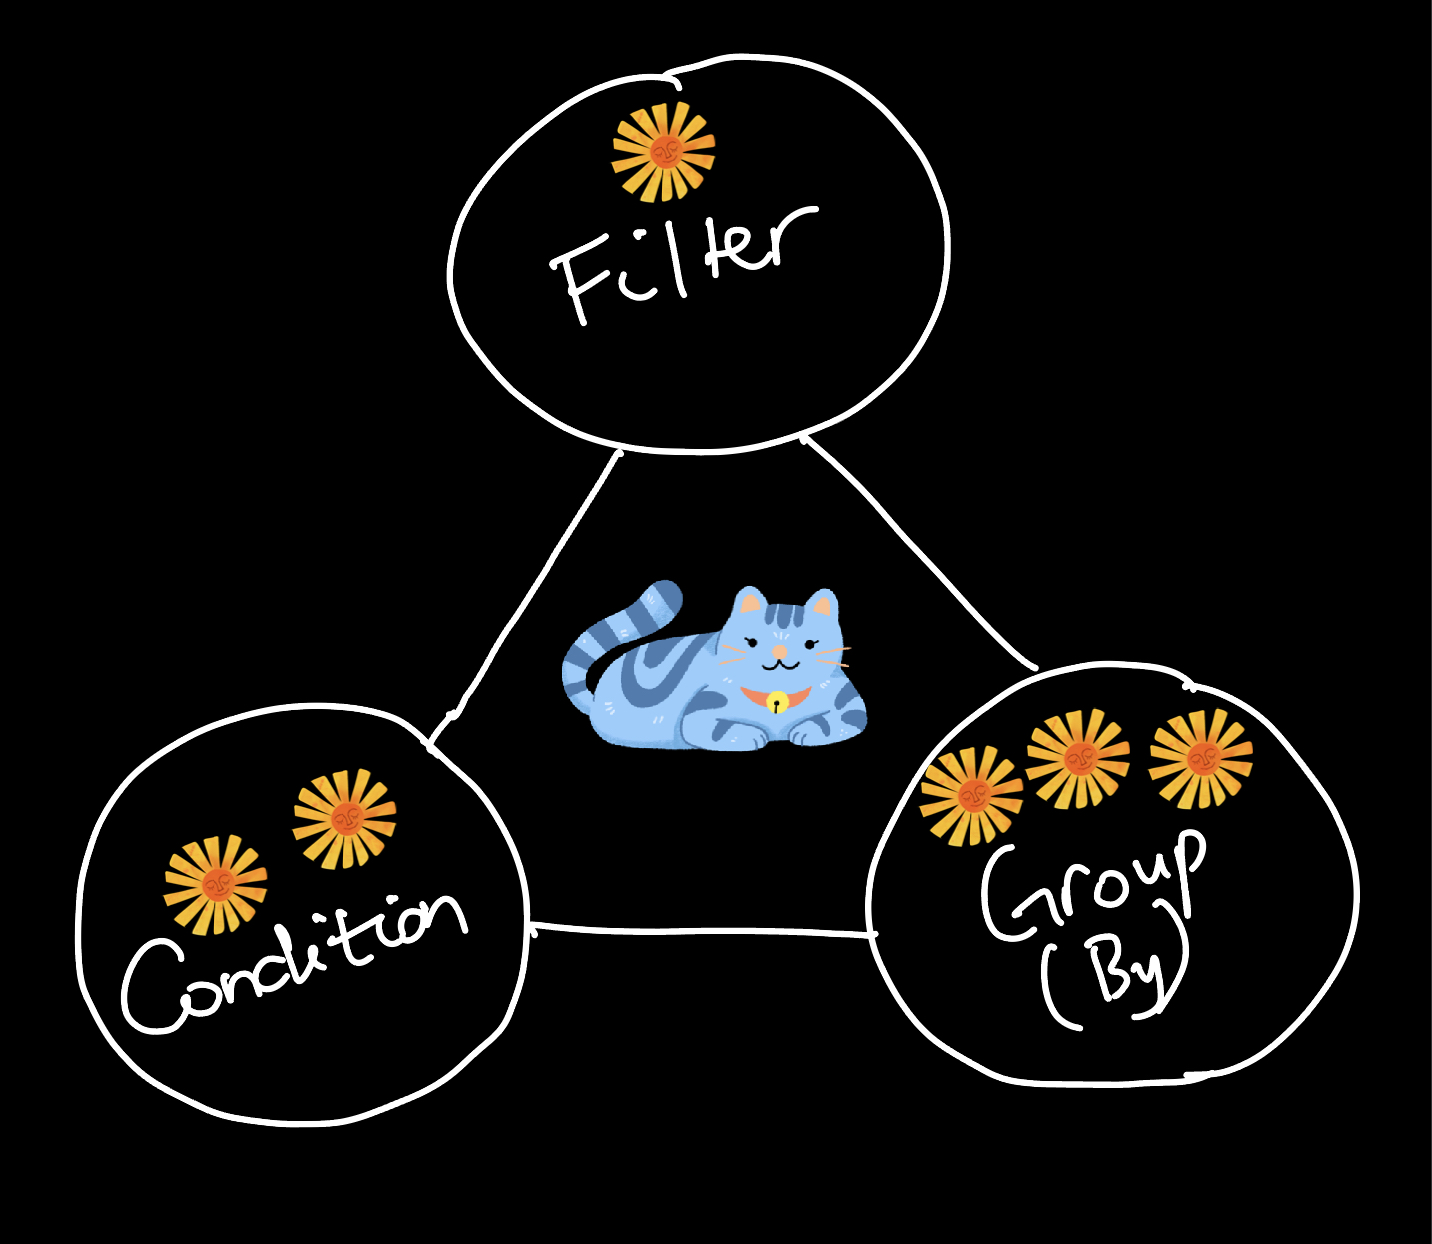

In [27]:
Image('images/data_triplet.jpg', width=400) #credit: Human Jo

In [157]:
#let's rename our subset as df to make things easier to type

df = df_netflix_subset

#drop all NA values corresponding to type, release_year, rating columns because these are the columns we're intersted in analysing

df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6172 entries, 0 to 8806
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   show_id        6172 non-null   object
 1   type           6172 non-null   object
 2   title          6172 non-null   object
 3   director       6172 non-null   object
 4   cast           5699 non-null   object
 5   country        5750 non-null   object
 6   date_added     6172 non-null   object
 7   release_year   6172 non-null   int64 
 8   rating         6172 non-null   object
 9   total_revenue  6172 non-null   int64 
dtypes: int64(2), object(8)
memory usage: 530.4+ KB


In [143]:
df = df.dropna(subset=['type', 'release_year', 'rating','director']) # drops missing values in the type, release_year, rating columns

#use threshold to drop columns with more than 10 missing values
# df.dropna(thresh=10, axis=1)

# #drop all rows with missing values
# df.dropna(inplace=True)

# #drop all columns with missing values
# df.dropna(axis=1)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6172 entries, 0 to 8806
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   show_id        6172 non-null   object
 1   type           6172 non-null   object
 2   title          6172 non-null   object
 3   director       6172 non-null   object
 4   cast           5699 non-null   object
 5   country        5750 non-null   object
 6   date_added     6172 non-null   object
 7   release_year   6172 non-null   int64 
 8   rating         6172 non-null   object
 9   total_revenue  6172 non-null   int64 
dtypes: int64(2), object(8)
memory usage: 530.4+ KB


In [144]:
df.loc[df['type'] == 'TV Show'] #how many TV shows are there?

# df.loc[(df['type'] == 'TV Show') & (df['release_year'] > 2010)]     #how many TV shows are there after 2010?

# df.loc[(df['type'] == 'TV Show') | (df['release_year'] > 2010)]     #how many TV shows are there or having been released after 2010?

#what if we want to find the TV shows that have been released after 2010 and have a rating of TV-MA?

df.loc[(df['type'] == 'TV Show') & (df['release_year'] > 2010) & (df['rating'] == 'TV-MA')] #why do we use loc here?

#// what if we want to find the TV shows that have been released after 2010 and have a rating of TV-MA or TV-14?

show_id     type                                              title  \
2         s3  TV Show                                          Ganglands   
5         s6  TV Show                                      Midnight Mass   
11       s12  TV Show                                   Bangkok Breaking   
47       s48  TV Show                              The Smart Money Woman   
110     s111  TV Show                  Money Heist: From Tokyo to Berlin   
...      ...      ...                                                ...   
8235   s8236  TV Show                                        The Calling   
8293   s8294  TV Show                                           The Fear   
8302   s8303  TV Show                                           The Five   
8549   s8550  TV Show  The Vietnam War: A Film by Ken Burns and Lynn ...   
8599   s8600  TV Show                                    Toast of London   

                                 director  \
2                         Julien Leclercq   
5                           Mike Flanagan   
11                      Kongkiat Komesiri   
47                         Bunmi Ajakaiye   
110   Luis Alfaro, Javier Gómez Santander   
...                                   ...   
8235                                Bumpy   
8293                      Michael Samuels   
8302                        Mark Tonderai   
8549               Ken Burns, Lynn Novick   
8599                      Michael Cumming   

                                                   cast         country  \
2     Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...             NaN   
5     Kate Siegel, Zach Gilford, Hamish Linklater, H...             NaN   
11    Sukollawat Kanarot, Sushar Manaying, Pavarit M...             NaN   
47    Osas Ighodaro, Ini Dima-Okojie, Kemi Lala Akin...             NaN   
110                                                 NaN             NaN   
...                                                 ...             ...   
8235                                                NaN           India   
8293  Peter Mullan, Anastasia Hille, Harry Lloyd, Pa...  United Kingdom   
8302  Tom Cullen, O.T. Fagbenle, Lee Ingleby, Sarah ...  United Kingdom   
8549                                                NaN   United States   
8599  Matt Berry, Robert Bathurst, Doon Mackichan, S...  United Kingdom   

              date_added  release_year rating  total_revenue  
2     September 24, 2021          2021  TV-MA            771  
5     September 24, 2021          2021  TV-MA            503  
11    September 23, 2021          2021  TV-MA            424  
47    September 16, 2021          2020  TV-MA            697  
110    September 3, 2021          2021  TV-MA            295  
...                  ...           ...    ...            ...  
8235       April 1, 2019          2018  TV-MA            133  
8293      March 31, 2017          2012  TV-MA            109  
8302  September 15, 2017          2016  TV-MA            863  
8549       June 20, 2018          2017  TV-MA            113  
8599   September 1, 2017          2015  TV-MA            145  

[124 rows x 10 columns]

In [145]:
new_df = df.loc[(df['type'] == 'TV Show') & (df['release_year'] > 2010) & ((df['rating'] == 'TV-MA') | (df['rating'] == 'TV-14'))] 
new_df.head(5)

show_id     type                                            title  \
2       s3  TV Show                                        Ganglands   
5       s6  TV Show                                    Midnight Mass   
8       s9  TV Show                    The Great British Baking Show   
11     s12  TV Show                                 Bangkok Breaking   
20     s21  TV Show  Monsters Inside: The 24 Faces of Billy Milligan   

             director                                               cast  \
2     Julien Leclercq  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...   
5       Mike Flanagan  Kate Siegel, Zach Gilford, Hamish Linklater, H...   
8     Andy Devonshire  Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...   
11  Kongkiat Komesiri  Sukollawat Kanarot, Sushar Manaying, Pavarit M...   
20    Olivier Megaton                                                NaN   

           country          date_added  release_year rating  total_revenue  
2              NaN  September 24, 2021          2021  TV-MA            771  
5              NaN  September 24, 2021          2021  TV-MA            503  
8   United Kingdom  September 24, 2021          2021  TV-14            933  
11             NaN  September 23, 2021          2021  TV-MA            424  
20             NaN  September 22, 2021          2021  TV-14            602

In [146]:
#let's sort by release year
new_df.sort_values('release_year', ascending=True)


show_id     type                          title             director  \
316     s317  TV Show                   Office Girls          Hsu Fu-chun   
8293   s8294  TV Show                       The Fear      Michael Samuels   
7340   s7341  TV Show   Los tiempos de Pablo Escobar    Alessandro Angulo   
3614   s3615  TV Show                     Reply 1997          Shin Won-ho   
6371   s6372  TV Show               Brave Miss World         Cecilia Peck   
...      ...      ...                            ...                  ...   
737     s738  TV Show                          Trese            Jay Oliva   
707     s708  TV Show                      Let's Eat  Sarawut Wichiensarn   
692     s693  TV Show              The Rational Life          Hsu Fu-chun   
626     s627  TV Show  Sophie: A Murder in West Cork           John Dower   
2         s3  TV Show                      Ganglands      Julien Leclercq   

                                                   cast  \
316   Roy Chiu, Alice Ko, Tia Lee, Patrick Lee, Kuo ...   
8293  Peter Mullan, Anastasia Hille, Harry Lloyd, Pa...   
7340                                                NaN   
3614  Jung Eun-ji, Seo In-guk, Shin So-yul, Ji-won E...   
6371                                      Linor Abargil   
...                                                 ...   
737   Shay Mitchell, Liza Soberano, Jon Jon Briones,...   
707   Apinya Sakuljaroensuk, Mawin Taweephol, Nat Sa...   
692   Qin Lan, Dylan Wang, Li Zonghan, Bao Wenjing, ...   
626                                                 NaN   
2     Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...   

                                         country          date_added  \
316                                       Taiwan      August 3, 2021   
8293                              United Kingdom      March 31, 2017   
7340                                    Colombia      August 1, 2018   
3614                                 South Korea      August 8, 2019   
6371  United States, Israel, Italy, South Africa   February 17, 2018   
...                                          ...                 ...   
737            Philippines, Singapore, Indonesia       June 11, 2021   
707                                          NaN       June 16, 2021   
692                                          NaN       June 18, 2021   
626                                          NaN       June 30, 2021   
2                                            NaN  September 24, 2021   

      release_year rating  total_revenue  
316           2011  TV-14            480  
8293          2012  TV-MA            109  
7340          2012  TV-14            434  
3614          2012  TV-MA             38  
6371          2013  TV-14            317  
...            ...    ...            ...  
737           2021  TV-MA            614  
707           2021  TV-14            609  
692           2021  TV-14            569  
626           2021  TV-MA            352  
2             2021  TV-MA            771  

[182 rows x 10 columns]

In [147]:
#let's reset the index
new_df.reset_index(drop=True, inplace=True) #drop=True means we are dropping the old index column
new_df.head(20)


#let's save this new dataframe
#new_df.to_csv('data/netflix_tvshows.csv', index=False)


show_id     type                                            title  \
0       s3  TV Show                                        Ganglands   
1       s6  TV Show                                    Midnight Mass   
2       s9  TV Show                    The Great British Baking Show   
3      s12  TV Show                                 Bangkok Breaking   
4      s21  TV Show  Monsters Inside: The 24 Faces of Billy Milligan   
5      s48  TV Show                            The Smart Money Woman   
6     s103  TV Show         Countdown: Inspiration4 Mission to Space   
7     s111  TV Show                Money Heist: From Tokyo to Berlin   
8     s149  TV Show                                       HQ Barbers   
9     s199  TV Show             King of Boys: The Return of the King   
10    s223  TV Show                                        Clickbait   
11    s224  TV Show    John of God: The Crimes of a Spiritual Healer   
12    s274  TV Show                                    Gone for Good   
13    s277  TV Show                                          Valeria   
14    s288  TV Show                                   I Need Romance   
15    s298  TV Show                                         Navarasa   
16    s311  TV Show              Cocaine Cowboys: The Kings of Miami   
17    s317  TV Show                                     Office Girls   
18    s381  TV Show                                        The Flash   
19    s389  TV Show          Plastic Cup Boyz: Laughing My Mask Off!   

                                             director  \
0                                     Julien Leclercq   
1                                       Mike Flanagan   
2                                     Andy Devonshire   
3                                   Kongkiat Komesiri   
4                                     Olivier Megaton   
5                                      Bunmi Ajakaiye   
6                                         Jason Hehir   
7                 Luis Alfaro, Javier Gómez Santander   
8                                     Gerhard Mostert   
9                                        Kemi Adetiba   
10                                      Brad Anderson   
11                     Mauricio Dias, Tatiana Villela   
12                                 Juan Carlos Medina   
13                                      Inma Torrente   
14                                   Sakon Tiacharoen   
15  Bejoy Nambiar, Priyadarshan, Karthik Narain, V...   
16                                       Billy Corben   
17                                        Hsu Fu-chun   
18                                        Glen Winter   
19                    Royale Watkins, Rich Schlansker   

                                                 cast         country  \
0   Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...             NaN   
1   Kate Siegel, Zach Gilford, Hamish Linklater, H...             NaN   
2   Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...  United Kingdom   
3   Sukollawat Kanarot, Sushar Manaying, Pavarit M...             NaN   
4                                                 NaN             NaN   
5   Osas Ighodaro, Ini Dima-Okojie, Kemi Lala Akin...             NaN   
6                                                 NaN             NaN   
7                                                 NaN             NaN   
8   Hakeem Kae-Kazim, Chioma Omeruah, Orukotan Ade...             NaN   
9   Sola Sobowale, Toni Tones, Richard Mofe-Damijo...         Nigeria   
10  Zoe Kazan, Betty Gabriel, Adrian Grenier, Phoe...             NaN   
11                                                NaN             NaN   
12  Finnegan Oldfield, Nicolas Duvauchelle, Guilla...          France   
13  Diana Gómez, Silma López, Paula Malia, Teresa ...           Spain   
14  Khemanit Jamikorn, Thitipoom Techaapaikhun, Ka...             NaN   
15  Suriya, Vijay Sethupathi, Revathy, Prakash Raj...           India   
16                                                N

The workflow is you pick the data that you're interested in, drop or handle the NaN values, then select subset of the data you need for analysis, and filter it by the conditions you need, reset the index and then most often then not, if useful, you save the data.

> How about strings?


In [148]:

 #how many movies contain the word night?
df.loc[df['title'].str.contains('Night') & (df['type'] == 'Movie')].head(5)


show_id   type                                        title  \
64      s65  Movie                                   Nightbooks   
240    s241  Movie           The Witcher: Nightmare of the Wolf   
556    s557  Movie                                The 8th Night   
564    s565  Movie                                Boogie Nights   
597    s598  Movie  Talladega Nights: The Ballad of Ricky Bobby   

                 director                                               cast  \
64        David Yarovesky       Winslow Fegley, Lidya Jewett, Krysten Ritter   
240          Han Kwang Il  Theo James, Mary McDonnell, Lara Pulver, Graha...   
556         Kim Tae-hyung  Lee Sung-min, Park Hae-joon, Kim You-jung, Nam...   
564  Paul Thomas Anderson  Mark Wahlberg, Burt Reynolds, Julianne Moore, ...   
597            Adam McKay  Will Ferrell, John C. Reilly, Sacha Baron Cohe...   

           country          date_added  release_year rating  total_revenue  
64             NaN  September 15, 2021          2021  TV-PG            977  
240            NaN     August 23, 2021          2021  TV-MA             40  
556    South Korea        July 2, 2021          2021  TV-14            467  
564  United States        July 1, 2021          1997      R            253  
597  United States        July 1, 2021          2006  PG-13            633

In [149]:
#describe this
df.loc[df['title'].str.contains('Night')].count()

show_id          38
type             38
title            38
director         38
cast             37
country          34
date_added       38
release_year     38
rating           38
total_revenue    38
dtype: int64

In [150]:
#how many movies do not contain the word night?
df.loc[~df['title'].str.contains('Night')].count()

show_id          6134
type             6134
title            6134
director         6134
cast             5662
country          5716
date_added       6134
release_year     6134
rating           6134
total_revenue    6134
dtype: int64

In [151]:
53 + 8754

8807

In [152]:
#what does value_counts do
df['type'].value_counts()

Movie      5942
TV Show     230
Name: type, dtype: int64

In [153]:
#you can do more complicated string operations with regular expressions
import re
night_or_day = df.loc[df['title'].str.contains('Night|Day', flags=re.I, regex=True)].head(5) #flags = re.I matches both upper and lower case
night_or_day

# night_or_day.count()

#we can reset the index and drop the old index column

night_or_day.reset_index(drop=True, inplace=True)

# we can save the dataframe to a csv file
night_or_day.to_csv('data/night_or_day.csv', index=False)

#this shows a complete workflow of how to clean and prepare data for analysis

### Conditioning

In [181]:
df = df_netflix_subset

mod_df = df.copy()

mod_df.loc[mod_df['rating'] == 'TV-MA', 'title'] = 'Jo was here'
mod_df

mod_df.loc[mod_df['rating'] == 'TV-MA', ['title', 'rating']] = ['GPT', 'ChatGPT']
mod_df[['rating', 'title']]

rating                             title
0       PG-13              Dick Johnson Is Dead
2     ChatGPT                               GPT
5     ChatGPT                               GPT
6          PG  My Little Pony: A New Generation
7     ChatGPT                               GPT
...       ...                               ...
8801  ChatGPT                               GPT
8802        R                            Zodiac
8804        R                        Zombieland
8805       PG                              Zoom
8806    TV-14                            Zubaan

[6172 rows x 2 columns]

In [178]:
mod_df = df.copy()

#you can also use the apply function to apply a function to a column

def add_title_cond(x):
    return x + '... Jo was here again yo!'

mod_df['title'] = mod_df['title'].apply(add_title_cond)
mod_df


# you can also add multiple conditions
def add_rating_cond(x):
    if x == 'TV-MA':
        return '...Who was here'
    elif x == 'TV-14':
        return '...no one'
    else:
        return x

mod_df['rating'] = mod_df['rating'].apply(add_title_cond)

#just show the rating and the title columns
mod_df[['rating', 'title']]

rating  \
0     PG-13... Jo was here again yo!   
2     TV-MA... Jo was here again yo!   
5     TV-MA... Jo was here again yo!   
6        PG... Jo was here again yo!   
7     TV-MA... Jo was here again yo!   
...                              ...   
8801  TV-MA... Jo was here again yo!   
8802      R... Jo was here again yo!   
8804      R... Jo was here again yo!   
8805     PG... Jo was here again yo!   
8806  TV-14... Jo was here again yo!   

                                                  title  
0         Dick Johnson Is Dead... Jo was here again yo!  
2                  Jo was here... Jo was here again yo!  
5                  Jo was here... Jo was here again yo!  
6     My Little Pony: A New Generation... Jo was her...  
7                  Jo was here... Jo was here again yo!  
...                                                 ...  
8801               Jo was here... Jo was here again yo!  
8802                    Zodiac... Jo was here again yo!  
8804                Zombieland... Jo was here again yo!  
8805                      Zoom... Jo was here again yo!  
8806                    Zubaan... Jo was here again yo!  

[6172 rows x 2 columns]

### GroupBy

Given a dataset, we can perform various types of aggregation. This allows us to get a feel for the overall structure of our data.

* count():	Total number of items
* first(), last():	First and last item
* mean(), median():	Mean and median
* min(), max():	Minimum and maximum
* std(), var():	Standard deviation and variance
* mad():	Mean absolute deviation
* prod():	Product of all items
* sum():	Sum of all items

Let's have a look again at .describe().

In [31]:
df_netflix.dropna().describe()

release_year  revenue_20th  revenue_21st  total_revenue
count   5332.000000   5332.000000   5332.000000    5332.000000
mean    2012.742123     24.336272    505.721305     530.057577
std        9.625831     14.363126    290.473692     290.977975
min     1942.000000      0.000000      0.000000       7.000000
25%     2011.000000     12.000000    247.000000     271.000000
50%     2016.000000     24.000000    513.500000     535.000000
75%     2018.000000     37.000000    761.000000     784.000000
max     2021.000000     49.000000    999.000000    1048.000000

As we saw before, the describe() method allows us to capture the global properties of our data. But what if we want to do a more in-depth analysis, by aggregating conditionally on a certain property. For example, let's say we want to find the mean of total_revenue of a particular type of media like the TV show. This is where the GroupBy comes in.

Following in the footsteps of Jake VanderPlas, a good way to think of GroupBy is: SPLIT, APPLY, COMBINE. Or, as I like to put it, divide et impera. 

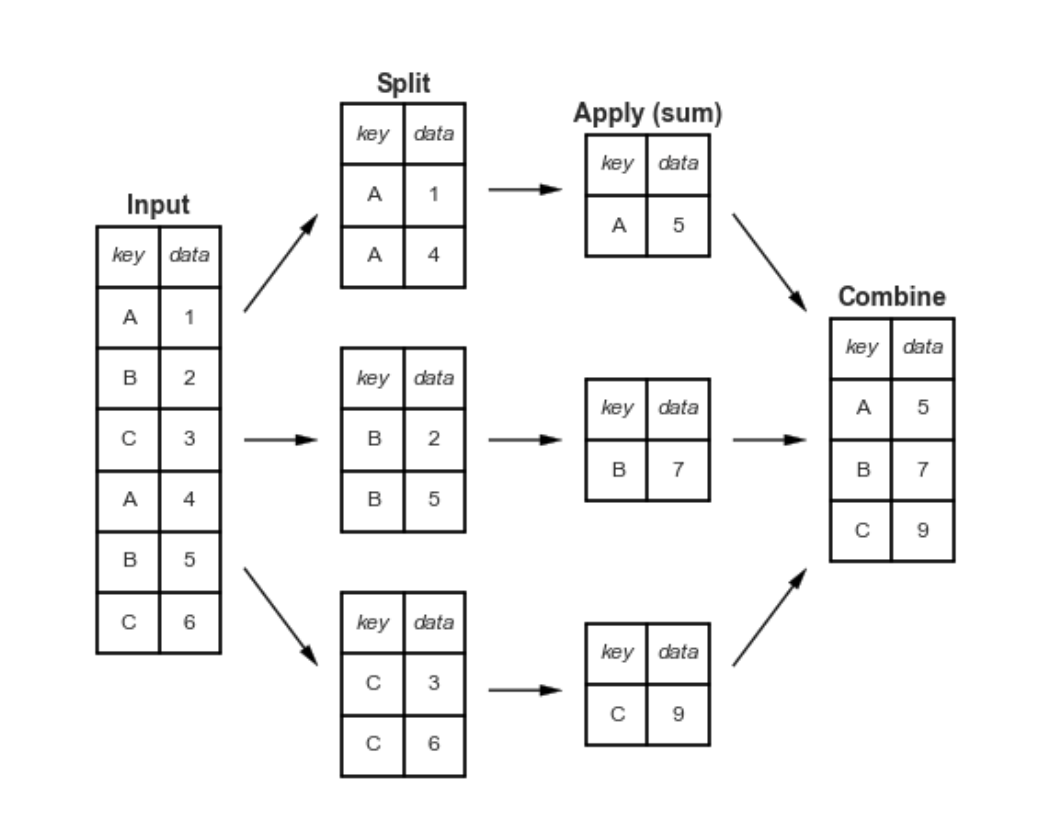

In [30]:
Image('images/groupby.png', width=400) #credit: Jake VanderPlas

[TBD reframe this]
* Split: breaking up and grouping a DataFrame depending on the value of the specified key.
* Apply: computing some function, usually an aggregate, transformation, or filtering, within the individual groups.
* Combine: step merges the results of these operations into an output array.


In [32]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data': range(6)}, columns=['key', 'data'])
df

key  data
0   A     0
1   B     1
2   C     2
3   A     3
4   B     4
5   C     5

In [34]:
df.groupby('key') #this is a GroupBy object, a special kind of dataframe that has not been evaluated yet


In [35]:
df.groupby('key').sum()

data
key      
A       3
B       5
C       7

In [216]:
mod_df = df.copy()

mod_df.groupby('type').count()


show_id  title  director  cast  country  date_added  release_year  \
type                                                                         
Movie       5942   5942      5942  5521     5561        5942          5942   
TV Show      230    230       230   178      189         230           230   

         rating  total_revenue  
type                            
Movie      5942           5942  
TV Show     230            230

In [217]:
mod_df.groupby('type').mean().sort_values('total_revenue', ascending=False)

mod_df.groupby('type').median().sort_values('total_revenue', ascending=False)

mod_df.groupby('type').count()

mod_df.groupby(['type', 'total_revenue']).count()


#can also do sum, min, max, std, var, describe, count, first, last, nth, head, tail, take, apply, agg, transform, filter, nunique, unique, value_counts


show_id  title  director  cast  country  date_added  \
type    total_revenue                                                        
Movie   7                    1      1         1     1        1           1   
        8                    1      1         1     1        0           1   
        10                   3      3         3     3        3           3   
        11                   3      3         3     3        3           3   
        12                   1      1         1     1        1           1   
...                        ...    ...       ...   ...      ...         ...   
TV Show 1014                 1      1         1     0        1           1   
        1026                 1      1         1     0        1           1   
        1032                 1      1         1     1        1           1   
        1034                 1      1         1     1        1           1   
        1043                 1      1         1     0        1           1   

                       release_year  rating  
type    total_revenue                        
Movie   7                         1       1  
        8                         1       1  
        10                        3       3  
        11                        3       3  
        12                        1       1  
...                             ...     ...  
TV Show 1014                      1       1  
        1026                      1       1  
        1032                      1       1  
        1034                      1       1  
        1043                      1       1  

[1232 rows x 8 columns]

In [218]:
#get the value counts

mod_df[['type', 'total_revenue']].sort_values('total_revenue', ascending=False).value_counts()

type     total_revenue
Movie    691              15
         167              13
         275              13
         262              13
         206              12
                          ..
TV Show  213               1
         214               1
         222               1
         224               1
         1043              1
Length: 1232, dtype: int64

### Concat and Merge

> Concat

In [83]:
df1 = pd.DataFrame({'ID': ['A', 'B'],
                    'Cookies ate': [10, 5]})
df2 = pd.DataFrame({'ID': ['C', 'D',],
                    'Cookies ate': [10, 15]})

df1

ID  Cookies ate
0  A           10
1  B            5

In [90]:
pd.concat([df1, df2]) #, ignore_index=True)

ID  Cookies ate
0  A           10
1  B            5
0  C           10
1  D           15

In [85]:
#concat on the columns
pd.concat([df1, df2], axis=1)

ID  Cookies ate ID  Cookies ate
0  A           10  C           10
1  B            5  D           15

> Merge!

In [91]:
# create two dataframes
df1 = pd.DataFrame({'Name': ['Ali', 'Fei', 'Jo', 'Yuan-Sen'],
                    'Cookies ate': [10, 5, 1000, 10]})
df2 = pd.DataFrame({'Name': ['Fei', 'Alex', 'Ali', 'Yuan-Sen'],
                    'Miles Ran': [10, 15, 20, 100]})
print(df1)



       Name  Cookies ate
0       Ali           10
1       Fei            5
2        Jo         1000
3  Yuan-Sen           10


In [46]:
print(df2)

        key  Miles Ran
0       Fei         10
1      Alex         15
2       Ali          0
3  Yuan-Sen        100


In [50]:
#merge the two dataframes
pd.merge(df1, df2, on='Name')

Name  Cookies ate  Miles Ran
0       Ali           10         20
1       Fei            5         10
2  Yuan-Sen           10        100

In [51]:
df3 = pd.DataFrame({'Superstar': ['Ali', 'Fei', 'Jo', 'Yuan-Sen'],
                    'Cookies ate': [10, 5, 1000, 10]})
df3

Superstar  Cookies ate
0       Ali           10
1       Fei            5
2        Jo         1000
3  Yuan-Sen           10

In [54]:
pd.merge(df3, df2, left_on='Superstar', right_on='Name')#.drop('Name', axis=1)

Superstar  Cookies ate      Name  Miles Ran
0       Ali           10       Ali         20
1       Fei            5       Fei         10
2  Yuan-Sen           10  Yuan-Sen        100

In [55]:
#show me an example of an outer join
pd.merge(df1, df2, on='Name', how='outer')


Name  Cookies ate  Miles Ran
0       Ali         10.0       20.0
1       Fei          5.0       10.0
2        Jo       1000.0        NaN
3  Yuan-Sen         10.0      100.0
4      Alex          NaN       15.0

In [59]:
#show me an example of an outer, left, right join
pd.merge(df1, df2, on='Name', how='right')

Name  Cookies ate  Miles Ran
0       Fei          5.0         10
1      Alex          NaN         15
2       Ali         10.0         20
3  Yuan-Sen         10.0        100

In [60]:
#we can also join on indices
df1.set_index('Name', inplace=True)
df2.set_index('Name', inplace=True)

df1

Cookies ate
Name                 
Ali                10
Fei                 5
Jo               1000
Yuan-Sen           10

In [61]:
df2

Miles Ran
Name               
Fei              10
Alex             15
Ali              20
Yuan-Sen        100

In [63]:
#join on indices
df1.join(df2, how='inner')

Cookies ate  Miles Ran
Name                            
Ali                10         20
Fei                 5         10
Yuan-Sen           10        100

In [66]:
df3.set_index('Superstar', inplace=True)

In [67]:
pd.merge(df3, df2, left_index=True, right_on='Name')

Cookies ate  Miles Ran
Name                            
Ali                10         20
Fei                 5         10
Yuan-Sen           10        100

For more examples, have a look at the excellent resource here: https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html

## Data Visualisation with Seaborn

In [13]:
#// let's do some plotting using seaborn
import seaborn as sns
sns.set(style="darkgrid")

df_netflix.count()

show_id         8807
type            8807
title           8807
director        6173
cast            7982
country         7976
date_added      8797
release_year    8807
rating          8803
duration        8804
listed_in       8807
description     8807
dtype: int64

In [17]:
#// create a new dataframe netflix_shows consisting of only TV shows

netflix_shows = df_netflix.loc[df_netflix['type'] == 'TV Show']
netflix_shows.count()

show_id         2676
type            2676
title           2676
director         230
cast            2326
country         2285
date_added      2666
release_year    2676
rating          2674
duration        2676
listed_in       2676
description     2676
dtype: int64

In [16]:
# do the same but for movies

netflix_movies = df_netflix.loc[df_netflix['type'] == 'Movie']
netflix_movies.count()


show_id         6131
type            6131
title           6131
director        5943
cast            5656
country         5691
date_added      6131
release_year    6131
rating          6129
duration        6128
listed_in       6131
description     6131
dtype: int64

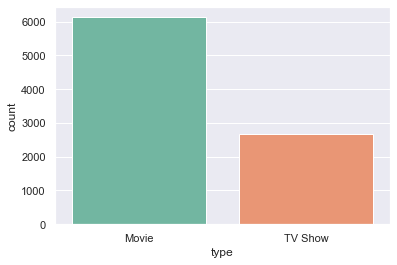

In [21]:
ax = sns.countplot(x="type", data=df_netflix, palette="Set2") #we can look at this visually using seaborn

<AxesSubplot:>

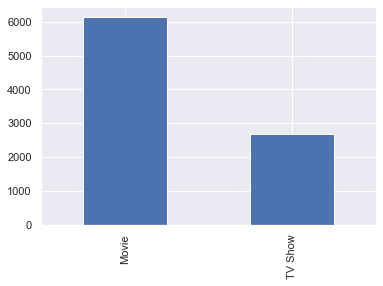

In [25]:
#plot the number of movies using pandas
df_netflix['type'].value_counts().plot(kind='bar')

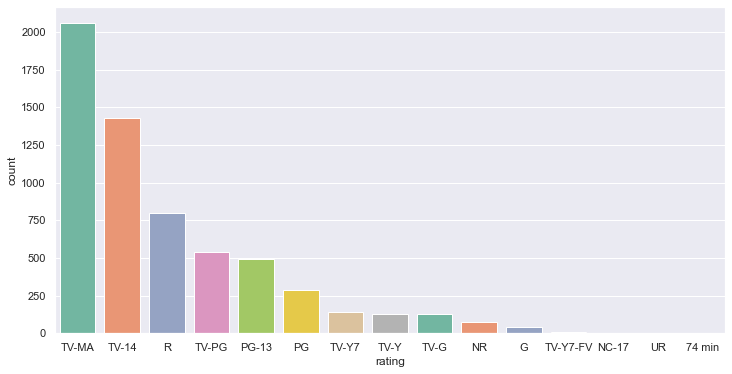

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))


sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=netflix_movies, palette="Set2", order=netflix_movies['rating'].value_counts().index[0:15])

For more numerical intensive datasets, let's load a new dataset.

In [46]:
iris = sns.load_dataset('iris')
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

<AxesSubplot:ylabel='Frequency'>

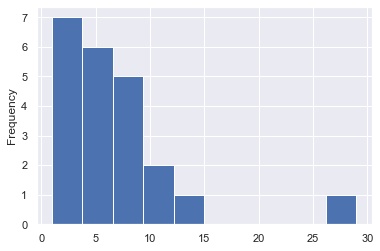

In [47]:
#plot histogram of the number of planets discovered per year using pandas
iris['petal_width'].value_counts().plot(kind='hist')

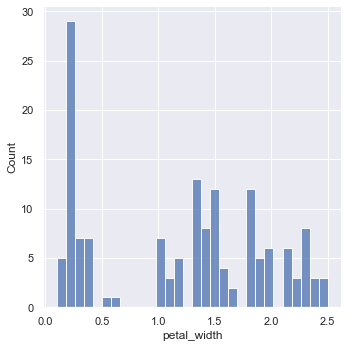

In [48]:
#plot histogram of the number of planets discovered per year using seaborn
sns.displot(iris['petal_width'], kde=False, bins=30) #if you change it to True, it will show a density plot

<AxesSubplot:xlabel='petal_width', ylabel='Density'>

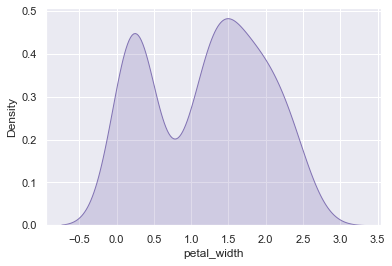

In [49]:
#plot a kdeplot
sns.kdeplot(iris['petal_width'], shade=True,color='m') #if you just want the kde line


In [50]:
iris

sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]

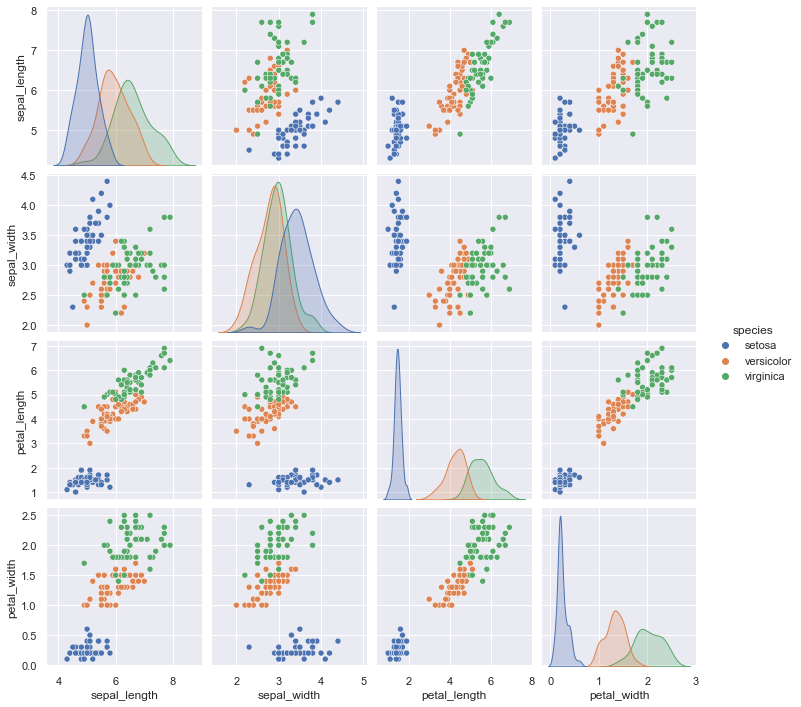

In [51]:
sns.pairplot(iris, hue='species', height=2.5);

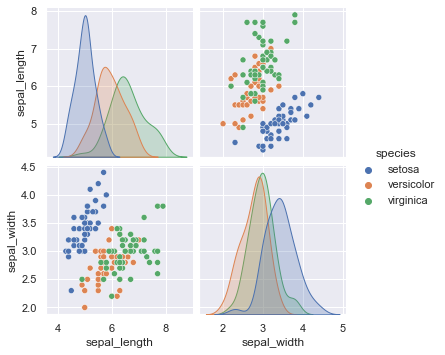

In [52]:
#only show the pairplot for sepal_length and sepal_width #if you want to subselect things
sns.pairplot(iris[['sepal_length', 'sepal_width', 'species']], hue='species', height=2.5);


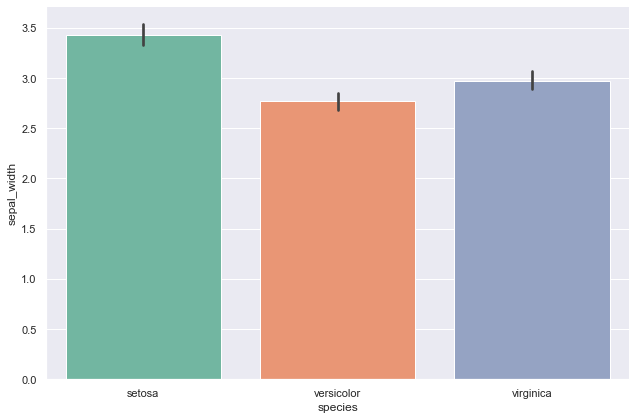

In [59]:
#// show a cat plot
sns.catplot(x='species', y='sepal_width', data=iris, kind='bar', height=6, aspect=1.5, palette='Set2')

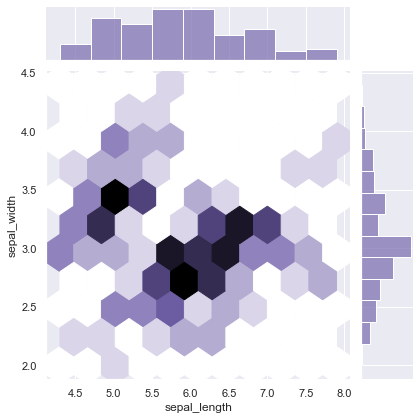

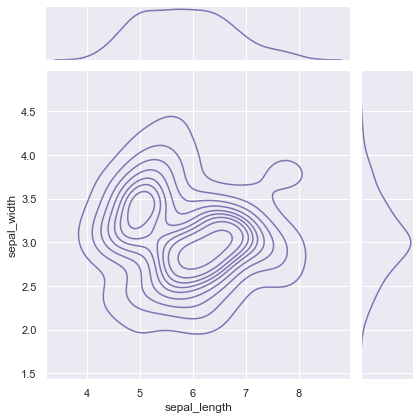

In [65]:
#// show a jointplot    
sns.jointplot(x='sepal_length', y='sepal_width', data=iris, kind='hex', color='m') #can change it to hex or kde here for example
#lets change it to kde

sns.jointplot(x='sepal_length', y='sepal_width', data=iris, kind='kde', color='m')


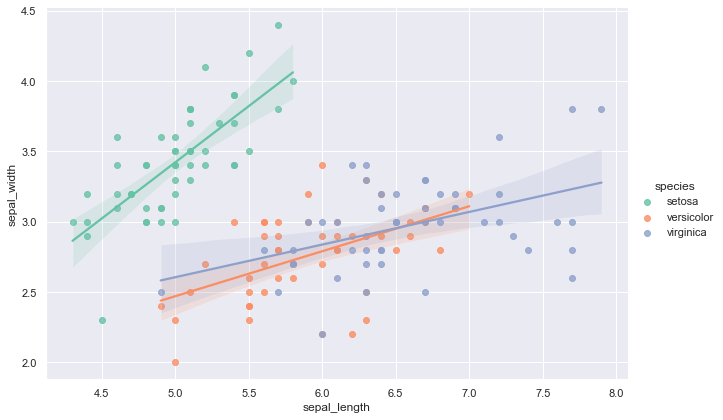

In [66]:
#//show a lmplot
sns.lmplot(x='sepal_length', y='sepal_width', data=iris, hue='species', height=6, aspect=1.5, palette='Set2')

<AxesSubplot:xlabel='species', ylabel='sepal_width'>

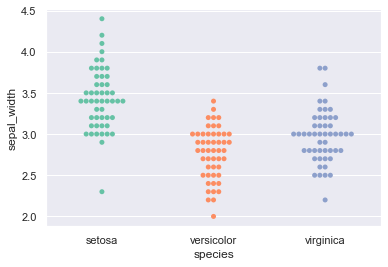

In [67]:
#//show a swarmplot
sns.swarmplot(x='species', y='sepal_width', data=iris, palette='Set2')

<AxesSubplot:xlabel='species', ylabel='sepal_width'>

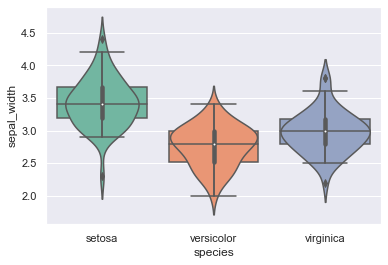

In [69]:
#show a violinplot
sns.violinplot(x='species', y='sepal_width', data=iris, palette='Set2')



<AxesSubplot:xlabel='species', ylabel='sepal_width'>

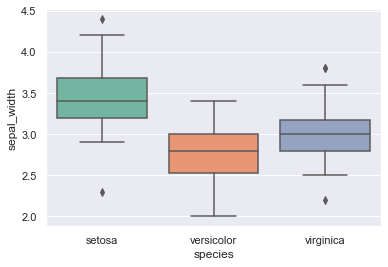

In [70]:
#show a boxplot
sns.boxplot(x='species', y='sepal_width', data=iris, palette='Set2')


<AxesSubplot:>

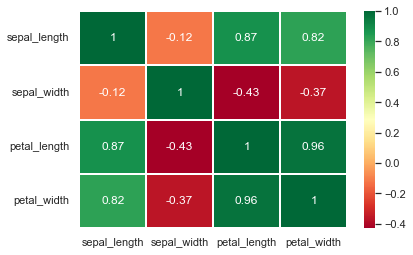

In [74]:
#show correlation matrix using seaborn
sns.heatmap(iris.corr(), annot=True, cmap='RdYlGn', linewidths=0.2) #data.corr()-->correlation matrix

There are, however, some instances where pandas is more natively strong when it comes to data science X vis.

<AxesSubplot:xlabel='species'>

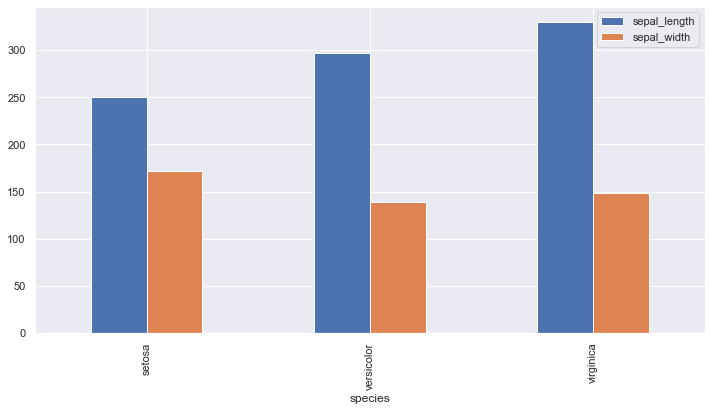

In [94]:
df_pivot = pd.pivot_table(iris,index=["species"],values=["sepal_length","sepal_width"],aggfunc=np.sum) #also do median, mean, max

#plot this information 
pd.pivot_table(iris,index=["species"],values=["sepal_length","sepal_width"],aggfunc=np.sum).plot(kind='bar', figsize=(12,6))



In [96]:
df_pivot.head(5)

sepal_length  sepal_width
species                              
setosa             250.3        171.4
versicolor         296.8        138.5
virginica          329.4        148.7

## Exploratory Data Analysis (~ 30 mins)

In this part of the notebook, we will work on a brand new dataset, in preparation for tomorrow's tutorial.

ciuca


In [2]:
# what is your current working directory?
!pwd


/Users/ciuca/Desktop/Monsoon-School-Intro-to-DS-Tutorial
